In [1]:
from nltk import word_tokenize
import os.path as op
import re 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import nltk

In [2]:
def vocabulary_fct(corpus, voc_threshold=0):
    """    
    Function using word counts to build a vocabulary - can be improved with a second parameter for 
    setting a frequency threshold
    Params:
        corpus (list of list of strings): corpus of sentences
        voc_threshold (int): maximum size of the vocabulary (0 means no limit !)
    Returns:
        vocabulary (dictionary): keys: list of distinct words across the corpus
                                 values: indexes corresponding to each word sorted by frequency        
    """
    stop_words = sklearn.feature_extraction.text.ENGLISH_STOP_WORDS
    
    word_counts = {}
    for sent in corpus:
        for word in [word.lower() for word in word_tokenize(sent) if word.isalpha()]:
            if (word not in stop_words):
                if (word not in word_counts):
                    word_counts[word] = 0
                word_counts[word] += 1           
    words = sorted(word_counts.keys(), key=word_counts.get, reverse=True)
    if voc_threshold > 0:
        words = words[:voc_threshold] + ['UNK']   
    vocabulary = {words[i] : i for i in range(len(words))}
    return vocabulary, {word: word_counts.get(word, 0) for word in vocabulary}

In [3]:
df = pd.read_csv('../Data_csv/data_preprocessed.csv')

texts = df['text'].values

In [4]:
stopwords = nltk.corpus.stopwords.words('english')

texts = [' '.join([word for word in text.split() if word not in stopwords]) for text in texts]

In [5]:
vectorizer = CountVectorizer(stop_words='english')
Bow = vectorizer.fit_transform(texts)

In [6]:
frequency = Bow.toarray().sum(axis = 0)
top_words = np.argsort(frequency)
vocabulary = np.array(vectorizer.get_feature_names_out())


In [7]:
top_indices = np.argsort(frequency)[-15:]  # Les indices des 15 mots les plus fréquents
vocabulary = np.array(vectorizer.get_feature_names_out())  # Le vocabulaire
top_words = vocabulary[top_indices]  # Les mots correspondants
top_frequencies = frequency[top_indices]

color: 12451
information: 12898
https: 12979
new: 13111
rights: 13647
research: 13789
digital: 14295
artificial: 15464
public: 15634
intelligence: 16894
human: 17411
use: 20060
systems: 20311
data: 58304
ai: 87199


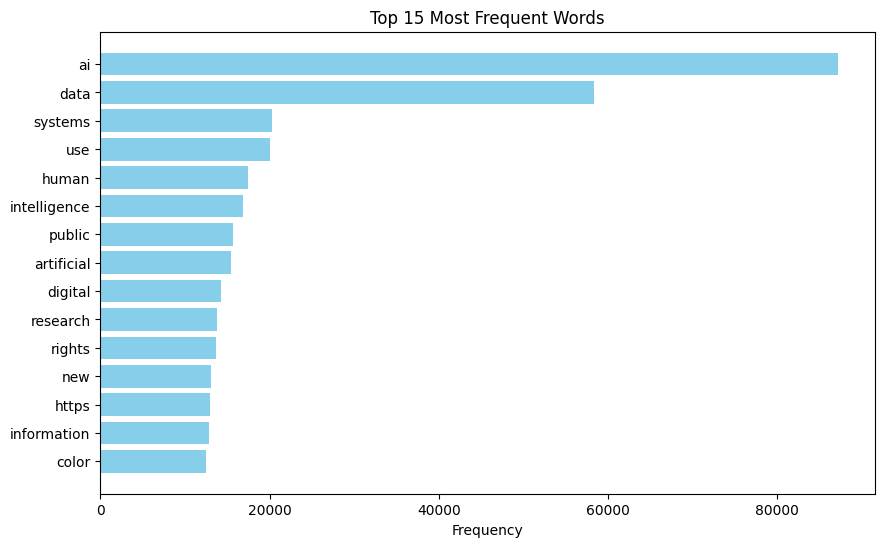

In [8]:
# Affichage des 15 mots les plus fréquents
for word, freq in zip(top_words, top_frequencies):
    print(f"{word}: {freq}")

# Optionnel : afficher les mots les plus fréquents sous forme d'histogramme
plt.figure(figsize=(10,6))
plt.barh(top_words, top_frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 15 Most Frequent Words')
plt.show()

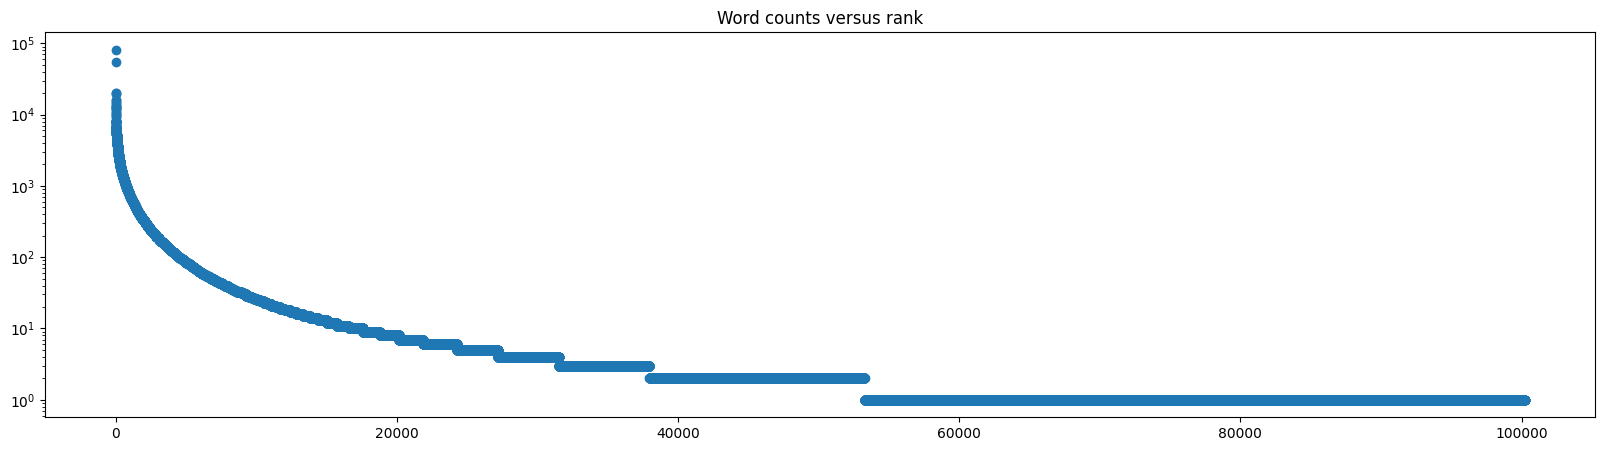

Vocabulary size: 100222
Part of the corpus by taking the "x" most frequent words:
2000 : 0.73
4000 : 0.84
6000 : 0.88
8000 : 0.91
10000 : 0.92
12000 : 0.93
14000 : 0.94
16000 : 0.95
18000 : 0.96
20000 : 0.96
22000 : 0.96
24000 : 0.97
26000 : 0.97
28000 : 0.97
30000 : 0.97
32000 : 0.98
34000 : 0.98
36000 : 0.98
38000 : 0.98
40000 : 0.98
42000 : 0.98
44000 : 0.98
46000 : 0.98
48000 : 0.99
50000 : 0.99
52000 : 0.99
54000 : 0.99
56000 : 0.99
58000 : 0.99
60000 : 0.99
62000 : 0.99
64000 : 0.99
66000 : 0.99
68000 : 0.99
70000 : 0.99
72000 : 0.99
74000 : 0.99
76000 : 0.99
78000 : 0.99
80000 : 0.99
82000 : 1.00
84000 : 1.00
86000 : 1.00
88000 : 1.00
90000 : 1.00
92000 : 1.00
94000 : 1.00
96000 : 1.00
98000 : 1.00
100000 : 1.00


In [9]:
vocab, word_counts = vocabulary_fct(texts)
rank_counts = {w:[vocab[w], word_counts[w]] for w in vocab}
rank_counts_array = np.array(list(rank_counts.values()))

plt.figure(figsize=(20,5))
plt.title('Word counts versus rank')
plt.scatter(rank_counts_array[:,0], rank_counts_array[:,1])
plt.yscale('log')
plt.show()

print('Vocabulary size: %i' % len(vocab))
print('Part of the corpus by taking the "x" most frequent words:')
for i in range(2000, len(vocab), 2000):
    print('%i : %.2f' % (i, np.sum(rank_counts_array[:i, 1]) / np.sum(rank_counts_array[:,1]) ))

In [10]:
import gensim.downloader as api

# Load pre-trained GloVe model
glove_model = api.load('glove-wiki-gigaword-100')  # Choose 100-dim, 200-dim, or 300-dim embeddings


[==================================================] 100.0% 128.1/128.1MB downloaded


In [12]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('../Data_csv/data_preprocessed.csv')
texts = df['text'].values

# Load pre-trained GloVe embeddings
glove_model = api.load('glove-wiki-gigaword-300')  # Load GloVe model (100 dimensions)

# Create a function to get the GloVe vector for a word
def get_embedding(word, model):
    try:
        return model[word]
    except KeyError:
        return np.zeros(100)  # Return a zero vector if the word is not in GloVe

# Get GloVe embeddings for each sentence in your corpus
def sentence_embedding(sentence, model):
    words = sentence.split()
    embeddings = [get_embedding(word, model) for word in words]
    return np.mean(embeddings, axis=0)  # Mean of word vectors as sentence embedding

# Example: Get sentence embeddings for your corpus
df['embedding'] = df['text'].apply(lambda x: sentence_embedding(x, glove_model))
print(df['embedding'].head())


[==================================================] 100.0% 376.1/376.1MB downloaded


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1021,) + inhomogeneous part.